In [1]:
using DifferentialEquations
using OrdinaryDiffEq
using Plots

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273


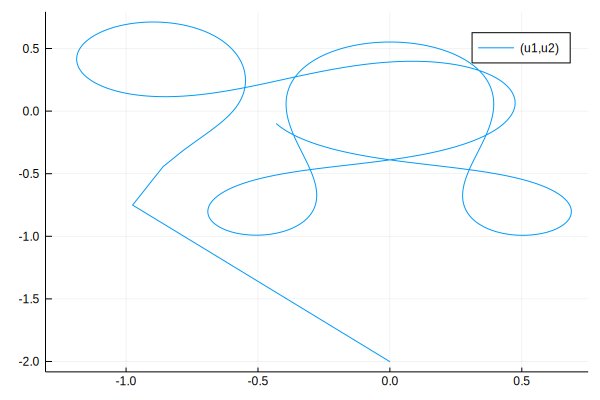

In [41]:
function plot_arensdorf()
     μ   = 0.012277471
     μ′  = 1 - μ

     function arensdorf_orbit(du, u, z, p, t)
         x, y  = z
         x′,y′ = u

         D(z) = ((x + z)^2  + y^2)^(3/2)
         D1 = D( μ)
         D2 = D(-μ′)

         x′′ = x + 2y′  - (μ′*(x + μ)/D1) - (μ*(x - μ′)/D2)
         y′′ = y - 2x′  - (μ′*y/D1)       - (μ*y/D2)

         du[1] = x′′
         du[2] = y′′
     end


     initial_positions =  [0.994,  0]
     initial_velocities = [0.0,   -2.001585106]
     tspan = (0.0, 13)
     prob = SecondOrderODEProblem(arensdorf_orbit, initial_velocities, initial_positions, tspan)
     sol = solve(prob, RK4(), dt=1/100);
     plot(sol,vars=(1,2))     
   end
plot_arensdorf()